<a href="https://colab.research.google.com/github/amitnits2016/fastai/blob/master/EmergencyVsNon/EmergencyVsNon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
from fastai.vision import *
from fastai.metrics import error_rate

In [11]:
path = '/content/drive/My Drive/AAIN0896/fastai/EmergencyVSNon-Emergency_VehicalClassification/'
# tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='train_images', test='test_images',valid_pct=0.2)

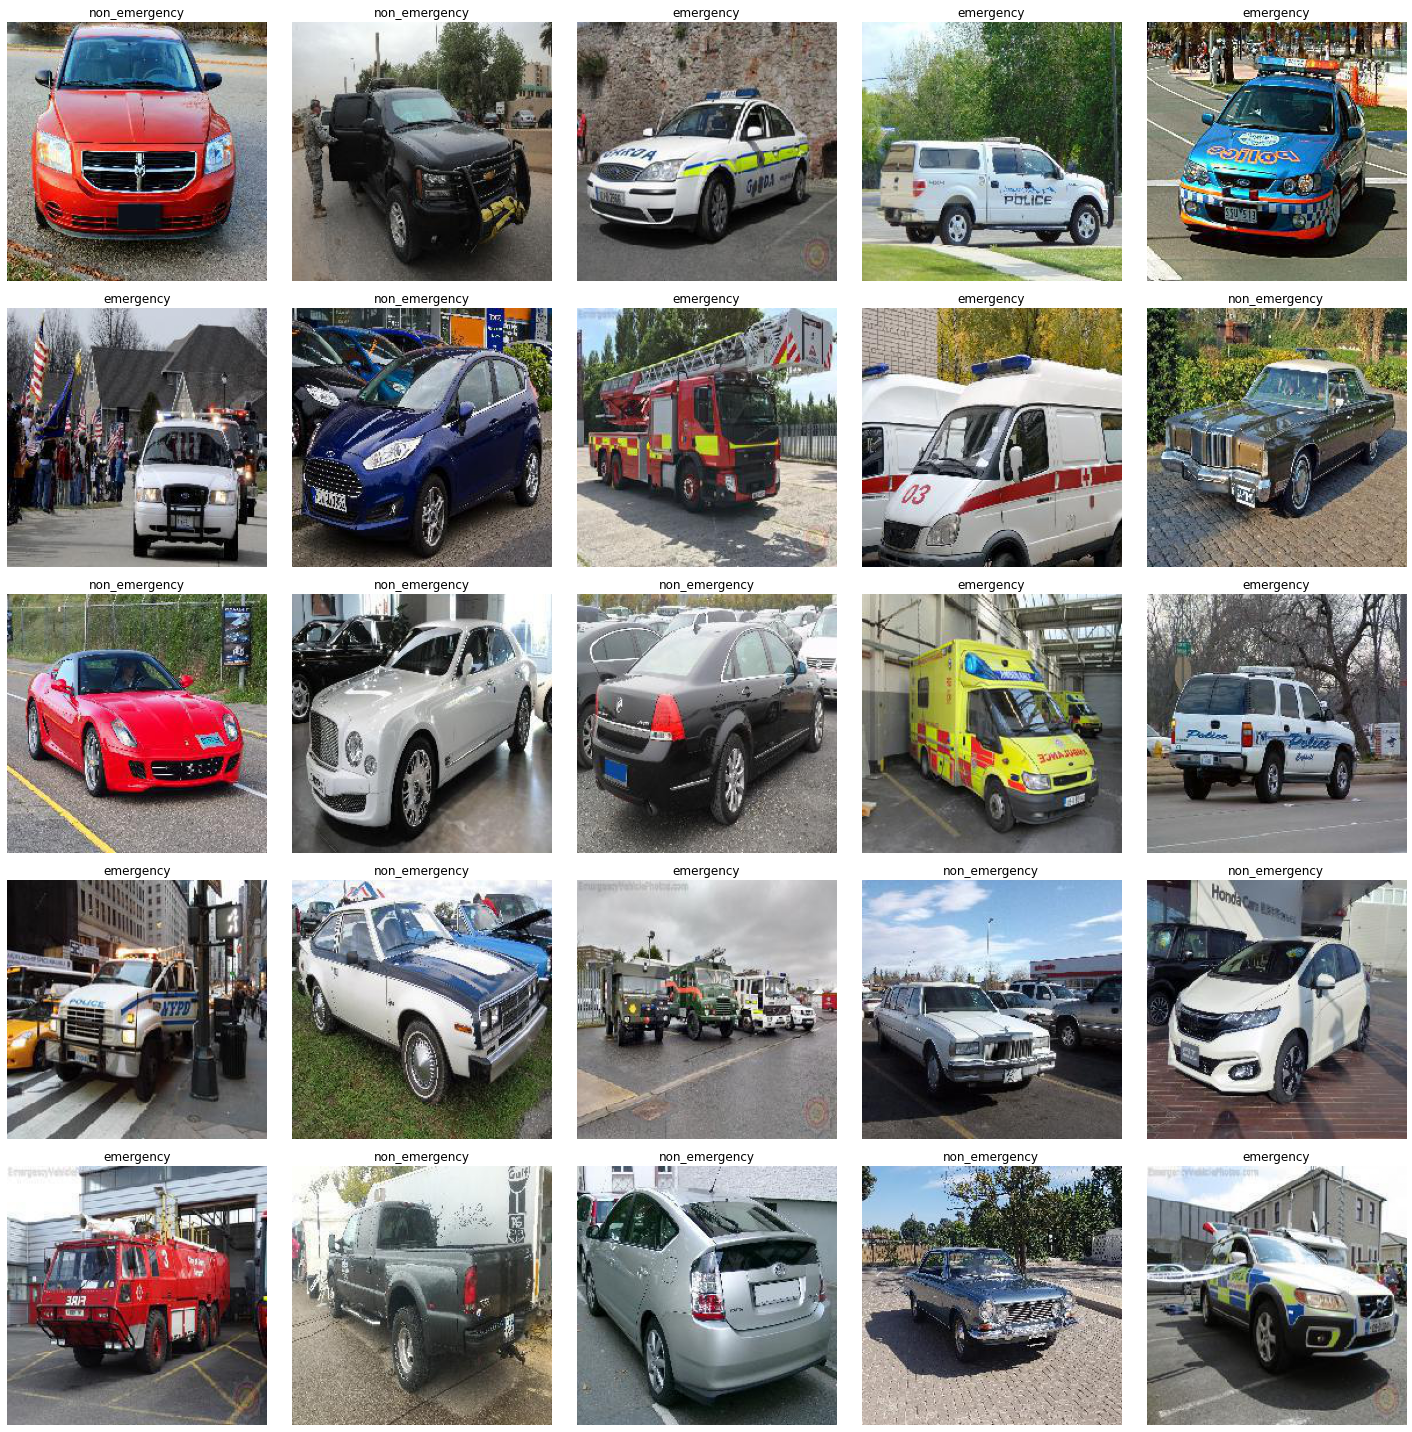

In [12]:
data.show_batch()

In [13]:
print(data.classes)
len(data.classes), data.c

['emergency', 'non_emergency']


(2, 2)

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [16]:
learn.fit_one_cycle(4)

In [17]:
learn.save('stage-1')